In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [4]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


# MISSING VALUES

In [5]:
df.isnull().sum()/len(df)*100

id                   0.000000
inning               0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
non_boundary         0.000000
is_wicket            0.000000
dismissal_kind      95.092212
player_dismissed    95.092212
fielder             96.493477
extras_type         94.710753
batting_team         0.000000
bowling_team         0.098724
dtype: float64

**As the columns dismissal_kind,player_dismissed,fielder,extras_type have missing values more than 90% dropping these columns**

In [6]:
dataset = df.drop(columns=['dismissal_kind','player_dismissed','fielder','extras_type'])

In [7]:
dataset

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians


In [8]:
d_1 = dataset.fillna(dataset['bowling_team'].mode()[0])

**Imputed the bowling team column by mode**

In [9]:
d_1.isnull().sum()/len(d_1)*100

id              0.0
inning          0.0
over            0.0
ball            0.0
batsman         0.0
non_striker     0.0
bowler          0.0
batsman_runs    0.0
extra_runs      0.0
total_runs      0.0
non_boundary    0.0
is_wicket       0.0
batting_team    0.0
bowling_team    0.0
dtype: float64

# Remove the outliers from the data

In [10]:
# Removing outliers from the data:
def remove_outliers(dataset):
    # Convert columns to numeric type
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')
    
    # Calculate quartiles for numeric columns
    Q1 = dataset_numeric.quantile(0.25)
    Q3 = dataset_numeric.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier step for each column
    outlier_step = 1.5 * IQR
    
    # Filter out the outliers
    outliers_removed_data = dataset[~((dataset_numeric < (Q1 - outlier_step)) | (dataset_numeric > (Q3 + outlier_step))).any(axis=1)]
    
    return outliers_removed_data

# Assuming d_1 is your DataFrame
# Call the function and assign the result to a new DataFrame
df = remove_outliers(d_1)



In [11]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,1237181,1,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142440 entries, 0 to 193467
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            142440 non-null  int64 
 1   inning        142440 non-null  int64 
 2   over          142440 non-null  int64 
 3   ball          142440 non-null  int64 
 4   batsman       142440 non-null  object
 5   non_striker   142440 non-null  object
 6   bowler        142440 non-null  object
 7   batsman_runs  142440 non-null  int64 
 8   extra_runs    142440 non-null  int64 
 9   total_runs    142440 non-null  int64 
 10  non_boundary  142440 non-null  int64 
 11  is_wicket     142440 non-null  int64 
 12  batting_team  142440 non-null  object
 13  bowling_team  142440 non-null  object
dtypes: int64(9), object(5)
memory usage: 16.3+ MB


# EXPLORATORY DATA ANALYSIS

<Axes: >

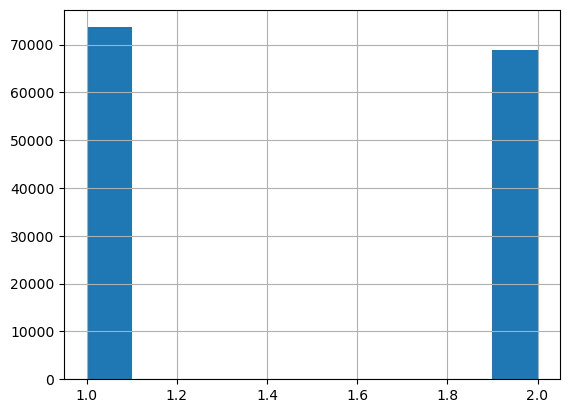

In [13]:
df['inning'].hist()

<Axes: >

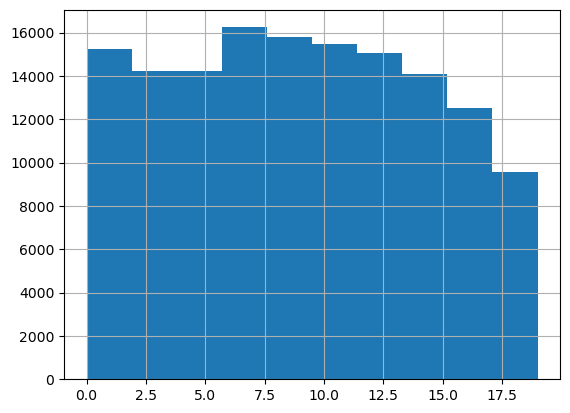

In [14]:
df['over'].hist()

<Axes: >

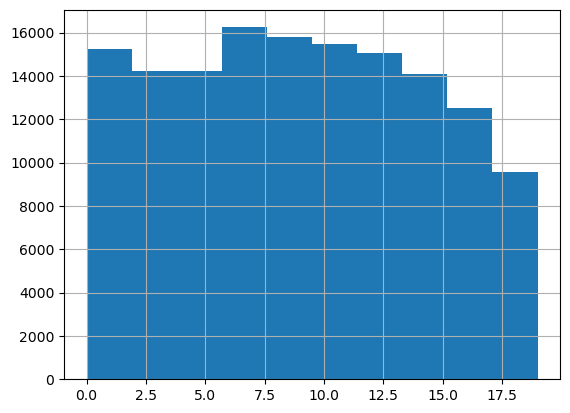

In [15]:
df['over'].hist()

<Axes: >

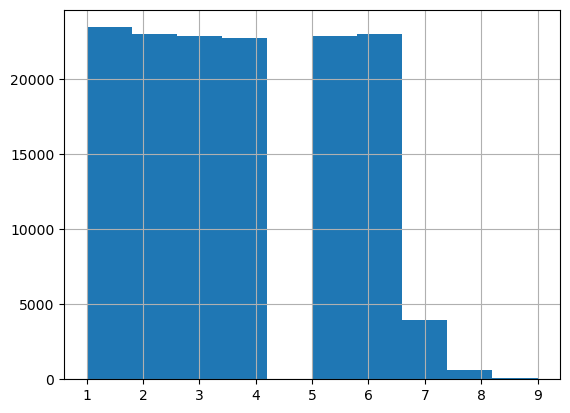

In [16]:
df['ball'].hist()

<Axes: >

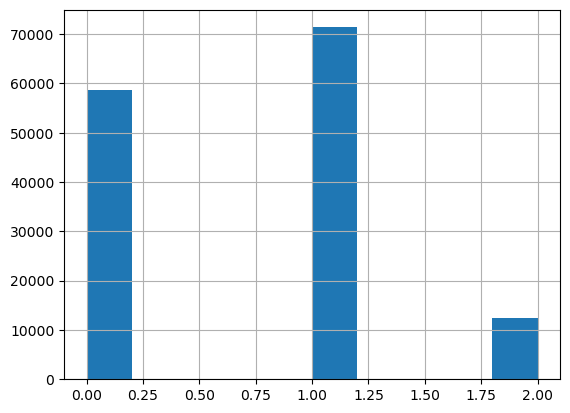

In [17]:
df['total_runs'].hist()

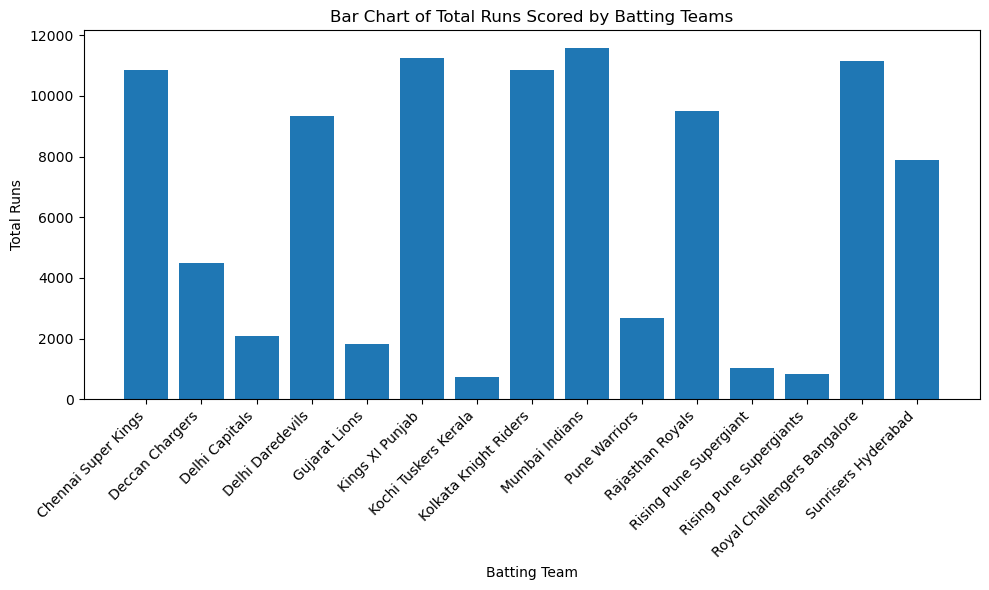

In [18]:
import matplotlib.pyplot as plt

# Assuming df contains columns 'batting_team' and 'total_runs'

# Group the data by batting team and calculate the total runs scored by each team
team_total_runs = df.groupby('batting_team')['total_runs'].sum()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(team_total_runs.index, team_total_runs.values)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees

plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.title('Bar Chart of Total Runs Scored by Batting Teams')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Here we can see that in IPL Mumbai Indians has made the highest total_runs**

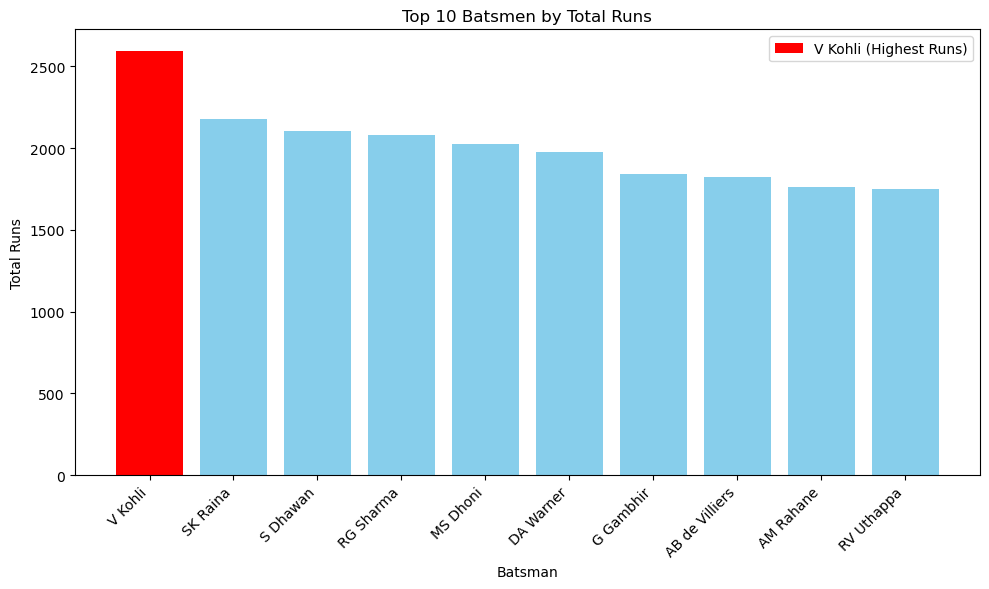

In [19]:
import matplotlib.pyplot as plt

# Assuming df contains columns 'batsman' and 'batsman_runs'

# Group the data by batsman and calculate the total runs made by each batsman
batsman_total_runs = df.groupby('batsman')['batsman_runs'].sum()

# Sort batsmen by total runs in descending order
batsman_total_runs_sorted = batsman_total_runs.sort_values(ascending=False)

# Select top N batsmen
top_n = 10
top_batsmen = batsman_total_runs_sorted.head(top_n)

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_batsmen.index, top_batsmen.values, color='skyblue')

# Highlight the batsman with the highest total runs
highest_runs_batsman = top_batsmen.idxmax()
plt.bar(highest_runs_batsman, top_batsmen[highest_runs_batsman], color='red', label=f'{highest_runs_batsman} (Highest Runs)')

plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title(f'Top {top_n} Batsmen by Total Runs')

plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend()  # Show legend for the highlighted batsman

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**We can see that batsman V Kohli has made highest runs in the IPL**

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1198784461.py:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, top_bowlers.max() * 1.1)  # Set y-axis limit to ensure all bars are visible


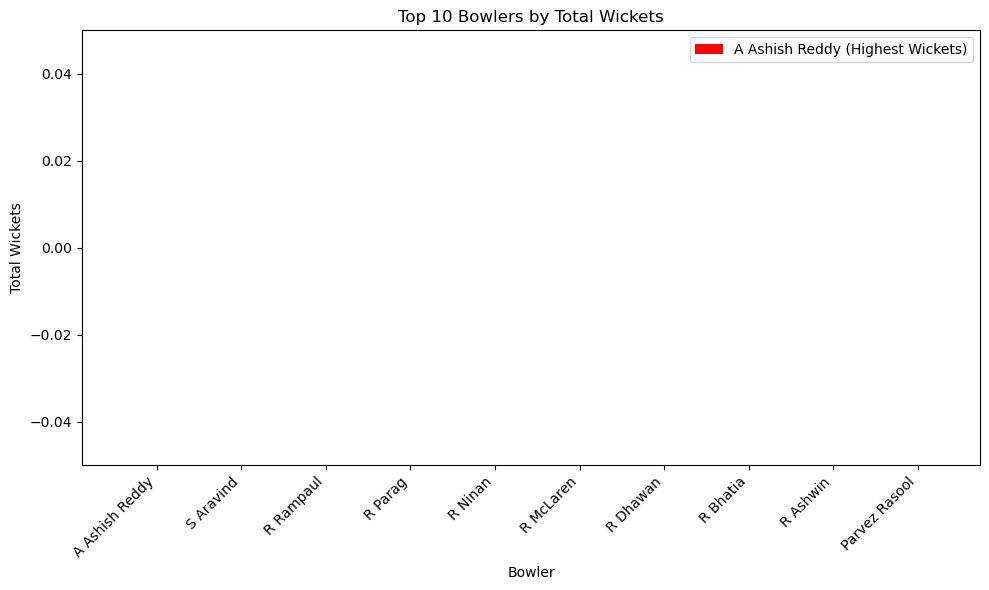

In [20]:
import matplotlib.pyplot as plt

# Assuming df contains columns 'bowler' and 'is_wicket'

# Group the data by bowler and count the number of wickets taken by each bowler
bowler_wickets = df.groupby('bowler')['is_wicket'].sum()

# Sort bowlers by number of wickets in descending order
bowler_wickets_sorted = bowler_wickets.sort_values(ascending=False)

# Select top N bowlers
top_n = 10
top_bowlers = bowler_wickets_sorted.head(top_n)

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_bowlers.index, top_bowlers.values, color='lightgreen', width=0.5)  # Adjust the width of bars for better visibility

# Highlight the bowler with the highest number of wickets
highest_wickets_bowler = top_bowlers.idxmax()
plt.bar(highest_wickets_bowler, top_bowlers[highest_wickets_bowler], color='red', label=f'{highest_wickets_bowler} (Highest Wickets)')

plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title(f'Top {top_n} Bowlers by Total Wickets')

plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.legend()  # Show legend for the highlighted bowler

plt.ylim(0, top_bowlers.max() * 1.1)  # Set y-axis limit to ensure all bars are visible

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**A Ashish Reddy took the highest number of wickets**

In [21]:
#Create a new feature strike rate
def calculate_strike_rate(row):
    if row['batsman_runs'] > 0:
        return (row['batsman_runs'] / row['ball']) * 100
    else:
        return 0

# Apply the custom function to each row and create a new column 'strike_rate'
df['strike_rate'] = df.apply(calculate_strike_rate, axis=1)

# Print the DataFrame with the new 'strike_rate' column
print(df)

             id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193462  1237181       1    12     4      SS Iyer      RR Pant   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\2516345352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strike_rate'] = df.apply(calculate_strike_rate, axis=1)


In [22]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20.000000
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,16.666667
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,50.000000
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,1237181,1,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,25.000000
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians,0.000000
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,16.666667
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians,50.000000


In [23]:
# Number of innings batsman has gone through
innings_count = df.groupby('batsman')['inning'].nunique()

# Create a new column 'innings' in the DataFrame
df['innings_by_batsman'] = df['batsman'].map(innings_count)

# Print the DataFrame with the new 'innings' column
print(df)

             id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193462  1237181       1    12     4      SS Iyer      RR Pant   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\873295715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['innings_by_batsman'] = df['batsman'].map(innings_count)


In [24]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20.000000,2
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,16.666667,2
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000,2
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,50.000000,2
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,33.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,1237181,1,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,25.000000,2
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians,0.000000,2
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,16.666667,2
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians,50.000000,2


In [25]:
# Calculate the total runs scored by each batsman:


# Calculate the total number of runs scored by each batsman
total_runs_by_batsman = df.groupby('batsman')['batsman_runs'].sum()

# Add the total runs scored by each batsman as a new feature/column
df['total_runs_by_batsman'] = df['batsman'].map(total_runs_by_batsman)

# Print the DataFrame with the new 'total_runs_by_batsman' co
print(df)

             id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193462  1237181       1    12     4      SS Iyer      RR Pant   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1156838085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_runs_by_batsman'] = df['batsman'].map(total_runs_by_batsman)


In [26]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman,total_runs_by_batsman
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20.000000,2,59
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,16.666667,2,916
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000,2,916
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,50.000000,2,916
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,33.333333,2,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,1237181,1,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,25.000000,2,922
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians,0.000000,2,710
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,16.666667,2,710
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians,50.000000,2,710


In [27]:
# Creating a feature Centuries : The number of innings in which the batsman has scored 100 or more runs.
total_runs_by_batsman = df.groupby('batsman')['batsman_runs'].sum()

# Filter out batsmen who scored 100 or more runs in total
centuries_data = total_runs_by_batsman[total_runs_by_batsman >= 100]

# Count the number of centuries for each batsman
centuries_count = centuries_data.apply(lambda x: x // 100)

# Add the number of centuries as a new feature/column
df['centuries'] = df['batsman'].map(centuries_count).fillna(0).astype(int)

# Print the DataFrame with the new 'centuries' column
print(df)

             id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193462  1237181       1    12     4      SS Iyer      RR Pant   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\2385929754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centuries'] = df['batsman'].map(centuries_count).fillna(0).astype(int)


In [28]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman,total_runs_by_batsman,centuries
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20.000000,2,59,0
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,16.666667,2,916,9
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000,2,916,9
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,50.000000,2,916,9
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,33.333333,2,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,1237181,1,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,25.000000,2,922,9
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Delhi Capitals,Mumbai Indians,0.000000,2,710,7
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Delhi Capitals,Mumbai Indians,16.666667,2,710,7
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Delhi Capitals,Mumbai Indians,50.000000,2,710,7


**As from the dataset we have created 4 new features 'strike_rate','innings by the batsmen','total_runs_by_batsmen','centuries'**

**After creating these features dropping total_runs and innings columns**

In [29]:
df.drop(columns=['total_runs','inning'],axis=1,inplace=True)

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\615609897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['total_runs','inning'],axis=1,inplace=True)


In [30]:
df.drop(['id'],axis=1,inplace=True)

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1350850736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'],axis=1,inplace=True)


In [31]:
df

,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman,total_runs_by_batsman,centuries
0,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20.000000,2,59,0
1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,16.666667,2,916,9
2,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000,2,916,9
3,7,2,BB McCullum,RT Ponting,Z Khan,1,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,50.000000,2,916,9
4,7,3,RT Ponting,BB McCullum,Z Khan,1,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,33.333333,2,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,12,4,SS Iyer,RR Pant,NM Coulter-Nile,1,0,0,0,Delhi Capitals,Mumbai Indians,25.000000,2,922,9
193463,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,Delhi Capitals,Mumbai Indians,0.000000,2,710,7
193464,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,0,0,Delhi Capitals,Mumbai Indians,16.666667,2,710,7
193466,13,2,RR Pant,SS Iyer,KH Pandya,1,0,0,0,Delhi Capitals,Mumbai Indians,50.000000,2,710,7


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142440 entries, 0 to 193467
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   over                   142440 non-null  int64  
 1   ball                   142440 non-null  int64  
 2   batsman                142440 non-null  object 
 3   non_striker            142440 non-null  object 
 4   bowler                 142440 non-null  object 
 5   batsman_runs           142440 non-null  int64  
 6   extra_runs             142440 non-null  int64  
 7   non_boundary           142440 non-null  int64  
 8   is_wicket              142440 non-null  int64  
 9   batting_team           142440 non-null  object 
 10  bowling_team           142440 non-null  object 
 11  strike_rate            142440 non-null  float64
 12  innings_by_batsman     142440 non-null  int64  
 13  total_runs_by_batsman  142440 non-null  int64  
 14  centuries              142440 non-null  i

# SCALING THE DATA

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the dataset loaded into a pandas DataFrame named 'cricket_data'
# You can read the data from a CSV file or any other source.

# Selecting only the numerical columns for scaling
numerical_columns = df.select_dtypes(include=['int64','int32','float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the DataFrame with scaled numerical columns
print(df)

            over   ball      batsman  non_striker           bowler  \
0       0.315789  0.500   RT Ponting  BB McCullum        AA Noffke   
1       0.315789  0.625  BB McCullum   RT Ponting        AA Noffke   
2       0.368421  0.000  BB McCullum   RT Ponting           Z Khan   
3       0.368421  0.125  BB McCullum   RT Ponting           Z Khan   
4       0.368421  0.250   RT Ponting  BB McCullum           Z Khan   
...          ...    ...          ...          ...              ...   
193462  0.631579  0.375      SS Iyer      RR Pant  NM Coulter-Nile   
193463  0.631579  0.500      RR Pant      SS Iyer  NM Coulter-Nile   
193464  0.631579  0.625      RR Pant      SS Iyer  NM Coulter-Nile   
193466  0.684211  0.125      RR Pant      SS Iyer        KH Pandya   
193467  0.684211  0.250      SS Iyer      RR Pant        KH Pandya   

        batsman_runs  extra_runs  non_boundary  is_wicket  \
0                0.5         0.0           0.0        0.0   
1                0.5         0.0     

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1284096970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [34]:
df

,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman,total_runs_by_batsman,centuries
0,0.315789,0.500,RT Ponting,BB McCullum,AA Noffke,0.5,0.0,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.100000,1.0,0.022727,0.00
1,0.315789,0.625,BB McCullum,RT Ponting,AA Noffke,0.5,0.0,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.083333,1.0,0.352851,0.36
2,0.368421,0.000,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.000000,1.0,0.352851,0.36
3,0.368421,0.125,BB McCullum,RT Ponting,Z Khan,0.5,0.0,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.250000,1.0,0.352851,0.36
4,0.368421,0.250,RT Ponting,BB McCullum,Z Khan,0.5,0.0,0.0,0.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.166667,1.0,0.022727,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,0.631579,0.375,SS Iyer,RR Pant,NM Coulter-Nile,0.5,0.0,0.0,0.0,Delhi Capitals,Mumbai Indians,0.125000,1.0,0.355162,0.36
193463,0.631579,0.500,RR Pant,SS Iyer,NM Coulter-Nile,0.0,0.0,0.0,0.0,Delhi Capitals,Mumbai Indians,0.000000,1.0,0.273498,0.28
193464,0.631579,0.625,RR Pant,SS Iyer,NM Coulter-Nile,0.5,0.0,0.0,0.0,Delhi Capitals,Mumbai Indians,0.083333,1.0,0.273498,0.28
193466,0.684211,0.125,RR Pant,SS Iyer,KH Pandya,0.5,0.0,0.0,0.0,Delhi Capitals,Mumbai Indians,0.250000,1.0,0.273498,0.28


# ENCODING CATEGORICAL VARIABLES:

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Selecting only the categorical columns for label encoding
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode it
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1411498225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1411498225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Pooja\AppData\Local\Temp\ipykernel_34704\1411498225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [36]:
df

,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,non_boundary,is_wicket,batting_team,bowling_team,strike_rate,innings_by_batsman,total_runs_by_batsman,centuries
0,0.315789,0.500,393,75,18,0.5,0.0,0.0,0.0,7,13,0.100000,1.0,0.022727,0.00
1,0.315789,0.625,77,388,18,0.5,0.0,0.0,0.0,7,13,0.083333,1.0,0.352851,0.36
2,0.368421,0.000,77,388,418,0.0,0.0,0.0,0.0,7,13,0.000000,1.0,0.352851,0.36
3,0.368421,0.125,77,388,418,0.5,0.0,0.0,0.0,7,13,0.250000,1.0,0.352851,0.36
4,0.368421,0.250,393,75,418,0.5,0.0,0.0,0.0,7,13,0.166667,1.0,0.022727,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,0.631579,0.375,453,380,258,0.5,0.0,0.0,0.0,2,8,0.125000,1.0,0.355162,0.36
193463,0.631579,0.500,385,449,258,0.0,0.0,0.0,0.0,2,8,0.000000,1.0,0.273498,0.28
193464,0.631579,0.625,385,449,258,0.5,0.0,0.0,0.0,2,8,0.083333,1.0,0.273498,0.28
193466,0.684211,0.125,385,449,181,0.5,0.0,0.0,0.0,2,8,0.250000,1.0,0.273498,0.28


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=3)  # Adjust the number of components as needed

# Fit PCA to the scaled data
X_pca = pca.fit_transform(df)

# Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3'])  # Adjust column names as needed

In [39]:
principal_components_df

,PC1,PC2,PC3
0,-219.295313,69.155778,196.466136
1,225.190774,53.130917,196.025847
2,224.428148,42.964461,-203.843438
3,224.428147,42.964470,-203.843439
4,-220.057940,58.989329,-203.403149
...,...,...,...
142435,-57.174320,-201.814803,-37.024606
142436,39.589838,-206.472875,-37.090726
142437,39.589837,-206.472867,-37.090726
142438,39.736643,-204.515817,39.884112


# CLUSTERING

# K Means 

In [40]:
from sklearn.cluster import KMeans

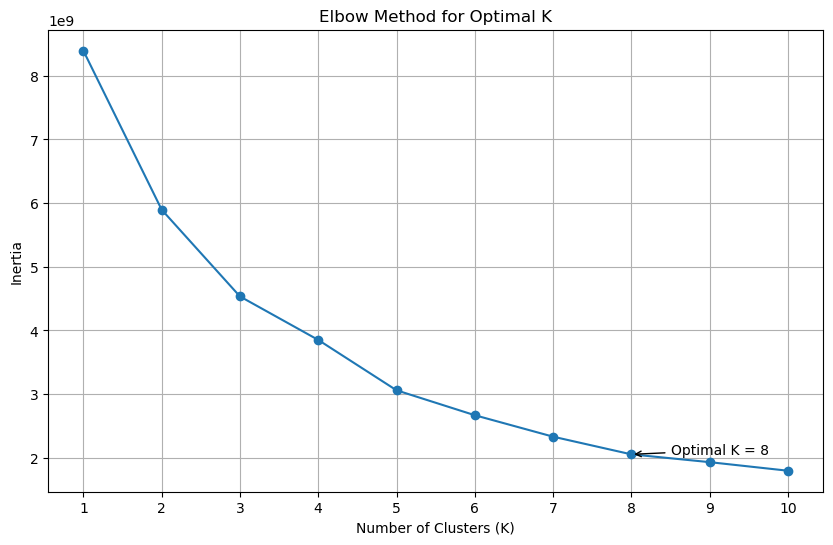

In [41]:
inertia = []

# Define range of K values to test
k_range = range(1, 11)  # Testing K values from 1 to 10

# Iterate over each value of K
for k in k_range:
    # Initialize KMeans with the current value of K
    kmeans = KMeans(n_clusters=k)
    
    # Fit KMeans to the data
    kmeans.fit(principal_components_df)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Find the elbow point
delta_inertia = [inertia[i] - inertia[i-1] for i in range(1, len(inertia))]
optimal_k = delta_inertia.index(max(delta_inertia)) + 1

# Add annotation for the optimal K value
plt.annotate(f'Optimal K = {optimal_k}', xy=(optimal_k, inertia[optimal_k-1]), xytext=(optimal_k+0.5, inertia[optimal_k-1]+200),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xticks(k_range)
plt.grid(True)
plt.show()

# Silhouette Method

In [42]:
principal_components_df

,PC1,PC2,PC3
0,-219.295313,69.155778,196.466136
1,225.190774,53.130917,196.025847
2,224.428148,42.964461,-203.843438
3,224.428147,42.964470,-203.843439
4,-220.057940,58.989329,-203.403149
...,...,...,...
142435,-57.174320,-201.814803,-37.024606
142436,39.589838,-206.472875,-37.090726
142437,39.589837,-206.472867,-37.090726
142438,39.736643,-204.515817,39.884112


# IMPLEMENTING K -MEANS IN PYTHON

In [43]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(principal_components_df)



KMeans(random_state=42)

In [44]:
# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

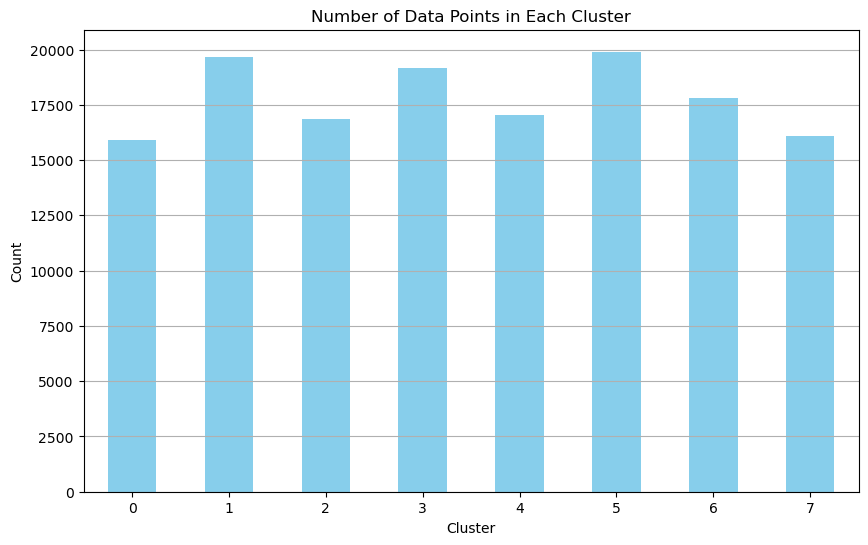

In [45]:
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

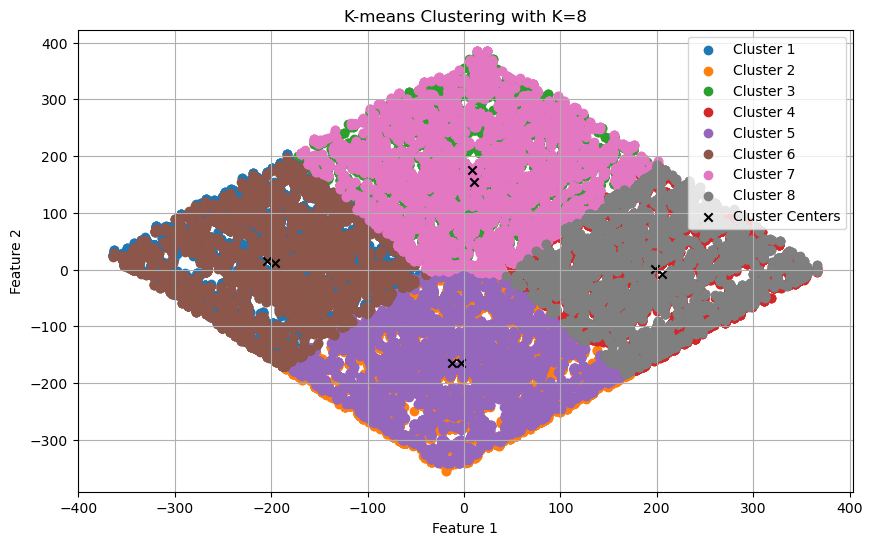

In [50]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(8):  # Number of clusters
    cluster_points = principal_components_df[labels == i]
    if not cluster_points.empty:
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Cluster Centers')

plt.title('K-means Clustering with K=8')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# PERFORMANCE METRIC FOR K MEANS

In [47]:
silhouette = silhouette_score(principal_components_df, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.2804833934380186


# # Hierarichal Clustering

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming principal_components_df is your DataFrame containing the data
# Taking a subset of the data for demonstration
subset_size = 1000
subset_df = principal_components_df[:subset_size]

# Performing hierarchical clustering
Z = linkage(subset_df, method='ward')  # Using Ward's method for linkage



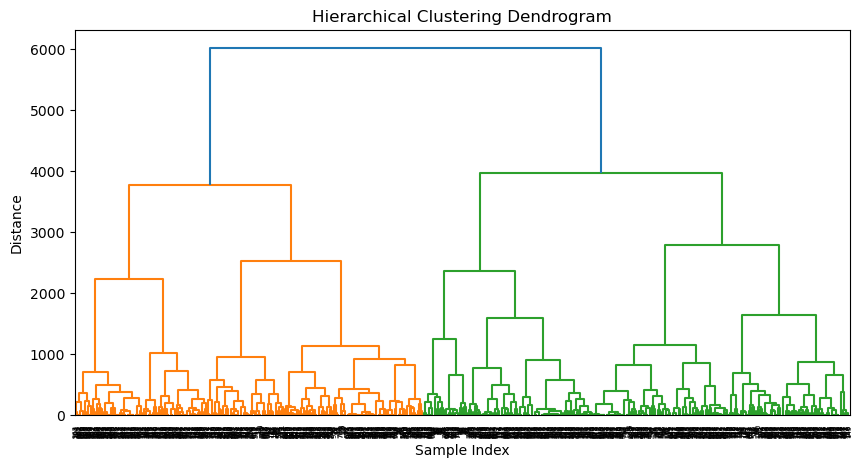

In [48]:
# Plotting dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

**Here we can create 2 clusters as highest vertical cuts 2 clusters**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Assuming principal_components_df is your DataFrame containing the data
# Taking a subset of the data for demonstration
subset_size = 1000
subset_df = principal_components_df[:subset_size]

# Performing hierarchical clustering
n_clusters = 2  # Specify the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(subset_df)


AgglomerativeClustering()

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


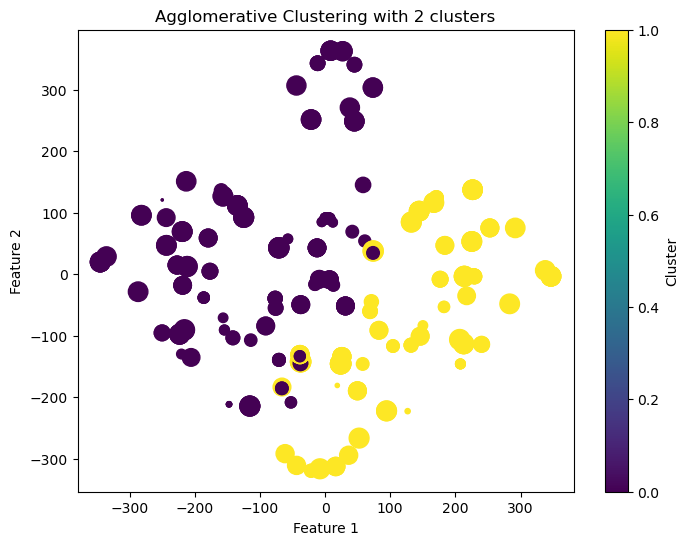

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Assuming principal_components_df is your DataFrame containing the data
# Taking a subset of the data for demonstration
subset_size = 1000
subset_df = principal_components_df.iloc[:subset_size, :]  # Ensure proper indexing here

# Performing hierarchical clustering
n_clusters = 2  # Specify the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(subset_df)

# Plotting the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(subset_df.iloc[:, 0], subset_df.iloc[:, 1],subset_df.iloc[:, 2],c=labels, cmap='viridis')  # Adjust columns according to your data
plt.title('Agglomerative Clustering with {} clusters'.format(n_clusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

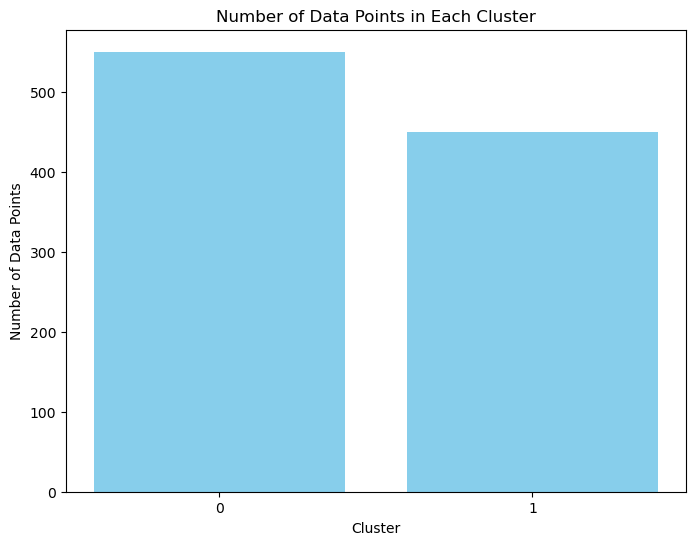

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Assuming principal_components_df is your DataFrame containing the data
# Taking a subset of the data for demonstration
subset_size = 1000
subset_df = principal_components_df.iloc[:subset_size, :]  # Ensure proper indexing here

# Performing hierarchical clustering
n_clusters = 2  # Specify the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(subset_df)

# Counting the number of data points in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(unique_labels)
plt.show()

# PERFORMANCE METRIC OF AGGLOMERATIVE CLUSTERING

In [53]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming principal_components_df is your DataFrame containing the data
# Taking a subset of the data for demonstration
subset_size = 1000
subset_df = principal_components_df.iloc[:subset_size, :]  # Ensure proper indexing here

# Performing hierarchical clustering
n_clusters = 2  # Specify the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(subset_df)

# Computing the silhouette score
silhouette_avg = silhouette_score(subset_df, labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.28461277504692284


# DBSCAN

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Calculating the distance to the k=2 nearest neighbors for each point
k = 2
nbrs = NearestNeighbors(n_neighbors=k).fit(principal_components_df)
distances, _ = nbrs.kneighbors(principal_components_df)



Text(0, 0.5, '2-Distance')

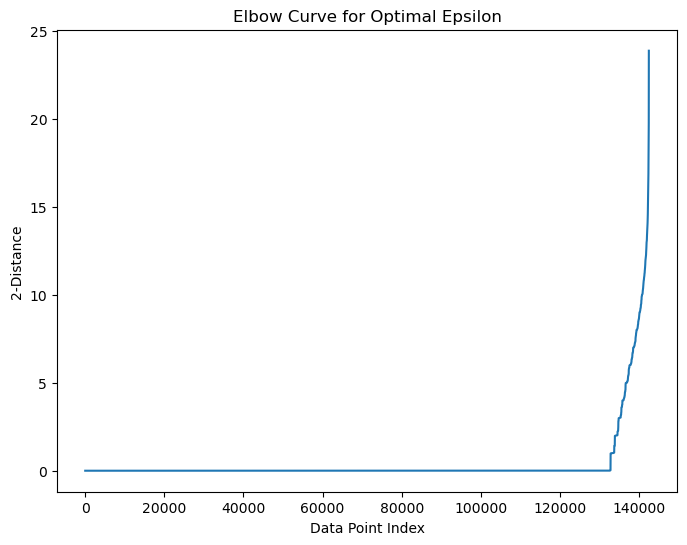

In [56]:
distances = np.sort(distances[:, -1])

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Elbow Curve for Optimal Epsilon')
plt.xlabel('Data Point Index')
plt.ylabel(f'{k}-Distance')

In [51]:
eps_optimal_index = np.argmax(np.diff(distances)) + 1
eps_optimal = distances[eps_optimal_index]

In [59]:
eps_optimal

0.9726338437192685

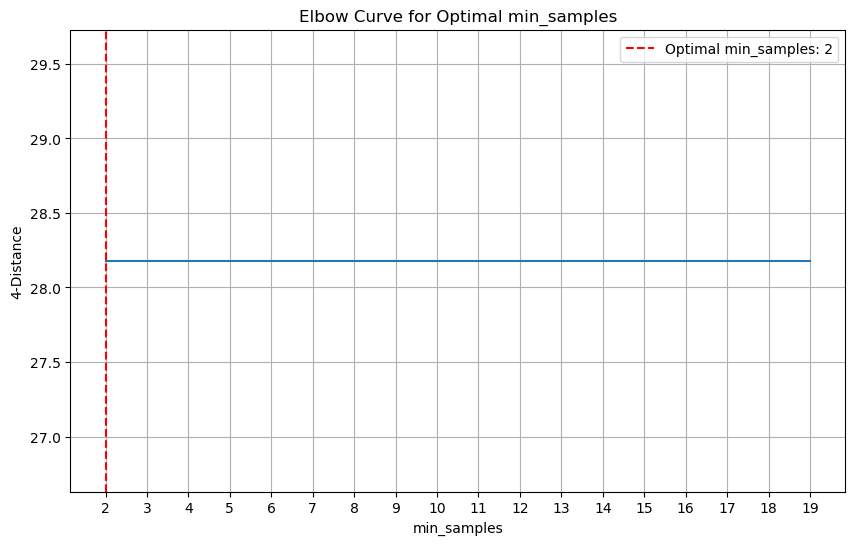

Optimal value of min_samples: 2


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Convert DataFrame to NumPy array
principal_components_array = principal_components_df.values

# Define a range of min_samples values to try
min_samples_range = range(2, 20)

# Calculate k-distance plot for each min_samples value
k = 4  # Choose the value of k for nearest neighbors
distances_list = []

for min_samples in min_samples_range:
    # Perform nearest neighbors calculation
    nbrs = NearestNeighbors(n_neighbors=k).fit(principal_components_array)
    distances, _ = nbrs.kneighbors(principal_components_array)
    distances = np.sort(distances[:, -1])  # Sorting distances
    distances_list.append(distances)

# Find the optimal value of min_samples
min_samples_optimal_index = np.argmax(np.diff(distances_list, axis=1), axis=1) + 2
min_samples_optimal = min_samples_optimal_index + 1

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(min_samples_range, np.max(distances_list, axis=1))
plt.title('Elbow Curve for Optimal min_samples')
plt.xlabel('min_samples')
plt.ylabel(f'{k}-Distance')
plt.xticks(min_samples_range)
plt.grid(True)

# Marking the optimal min_samples value on the plot
optimal_min_samples = min_samples_range[np.argmax(np.max(distances_list, axis=1))]
plt.axvline(x=optimal_min_samples, color='r', linestyle='--', label=f'Optimal min_samples: {optimal_min_samples}')
plt.legend()

plt.show()

print("Optimal value of min_samples:", optimal_min_samples)

**So, here we got the values for epsilon as 1 and min_samples as 2**

In [60]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming your data is stored in a variable named 'data'
# Convert DataFrame to NumPy array if needed
# data_array = data.values

# Create DBSCAN instance
dbscan = DBSCAN(eps=1, min_samples=2)

# Fit and predict clusters
labels = dbscan.fit_predict(principal_components_array)

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


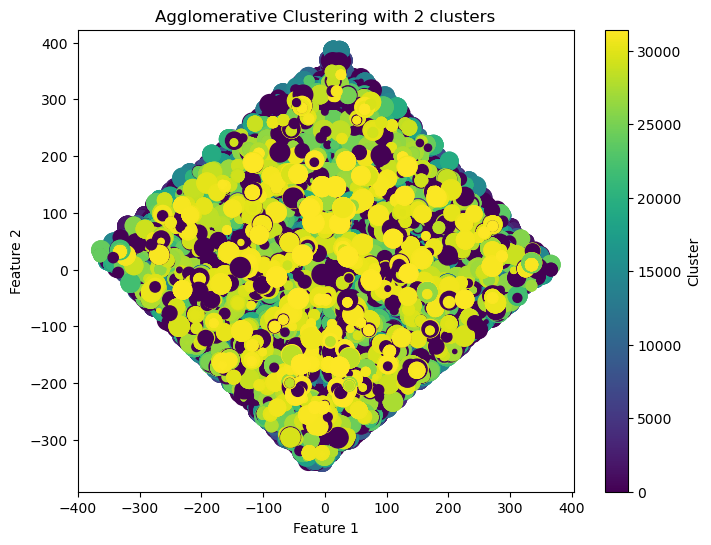

In [62]:
# Plotting the data points with cluster assignments
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_array[:, 0], principal_components_array[:, 1],principal_components_array[:, 2],c=labels, cmap='viridis')  # Adjust columns according to your data
plt.title('Agglomerative Clustering with {} clusters'.format(n_clusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [69]:
silhouette = silhouette_score(principal_components_df, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.8590406591304817


**As DBSCAN has silhouette score nearer to 1 as compared to hierarchical and Kmeans algorithm we should prefer using DBSCAN algorithm for the dataset**

In [52]:
unique_labels, counts = np.unique(labels, return_counts=True)

# Print the unique labels and their counts
print("Unique Labels:", unique_labels)
print("Counts:", counts)


Unique Labels: [0 1 2 3 4 5 6 7]
Counts: [15894 19681 16848 19154 17039 19901 17822 16101]


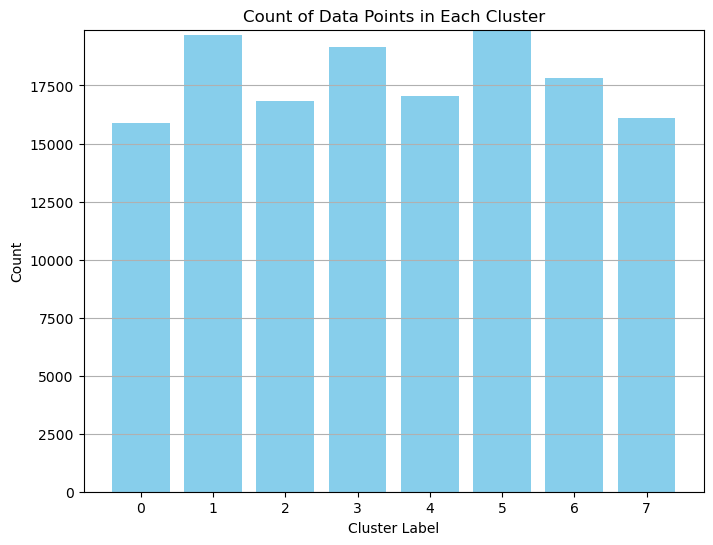

In [53]:
# Plot the count of data points in each cluster
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, color='skyblue')

# Set y-axis limit to ensure bars are visible
plt.ylim(0, max(counts) + 1)

plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(unique_labels)
plt.grid(axis='y')
plt.show()